In [5]:
from pyNIT import NIT
import pdb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.interpolate import CubicSpline

In [45]:
M = 1e6
mu = 1e1
p0 = 13.0
e0 = 0.4


err_arr = np.logspace(-14, -10, 20)
err_arr[0] = 1e-16

out_list = []
ts = []
for err in err_arr:
    t, p, e, Phi_phi, Phi_r = NIT(M, mu, p0, e0, err=err)
    out_list.append([t, p, e, Phi_phi, Phi_r])
    print(len(t), t.max())
    ts.append(t.max())
min_t_max = np.min(ts)

319 49094798.78280599
61 48189801.184873275
56 48564916.944925904
48 48610369.22265197
46 48134406.18981987
43 48046125.95744538
39 48372020.21469652
38 48534638.630917706
35 48509164.87321344
33 48623347.44369213
31 48786474.05513841
29 47210639.362585634
26 48328476.129120365
25 48742258.26584736
24 48462847.63014884
23 47980084.27525665
20 44970560.38409297
20 46978442.59524462
19 45988284.53163479
18 45856195.57380264


## $\Phi_\phi$ Mismatch

0.0
2.559600087437275e-09
2.150585709514985e-09
8.01983990328381e-09
1.6045496598060538e-08
1.668952243072397e-08
4.632620775879559e-08
1.0092927726912393e-07
7.978620675253012e-08
1.3709263180228248e-07
3.882066533789086e-07
4.974760730025451e-07
9.054446913348002e-07
1.6212842727236776e-06
3.38665893273582e-06
3.2673433117968997e-06
5.0552622385624524e-05
1.4540388616368638e-05
1.8361622694973434e-05
8.615081542218128e-05


Text(0.5, 0, 'Err Setting for Integrator')

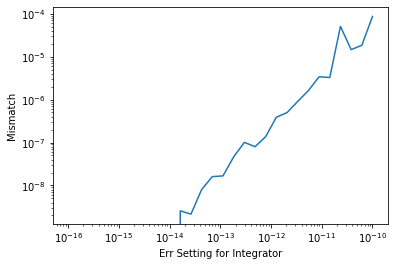

In [46]:
plt.close()
dt = 10.0
new_t = np.arange(0.0, min_t_max+dt, dt)
mismatch_list = []
for i, (t, p, e, Phi_phi, Phi_r) in enumerate(out_list):
    spl = CubicSpline(t, Phi_phi)
    new_Phi_phi = spl(new_t)
    
    if i == 0:
        control = new_Phi_phi
    
    comp = np.dot(np.exp(1j*control).conj(), np.exp(1j*new_Phi_phi))
    norm1 = np.dot(np.exp(1j*control).conj(), np.exp(1j*control))
    norm2 = np.dot(np.exp(1j*new_Phi_phi).conj(), np.exp(1j*new_Phi_phi))
    mismatch = comp/np.sqrt(norm1*norm2)
    print(1 - mismatch.real)
    mismatch_list.append(mismatch)

ax = plt.gca()
mismatch_list = np.asarray(mismatch_list)
ax.loglog(err_arr, 1-mismatch_list.real)
ax.set_ylabel('Mismatch')
ax.set_xlabel('Err Setting for Integrator')

## $\Phi_r$ Mismatch

0.0
3.8023084680816055e-10
3.074311916151373e-10
1.1098939545206576e-09
2.371714935556213e-09
2.4183366420515995e-09
6.824228293567103e-09
1.4636169054504933e-08
1.180398789824011e-08
1.9899814573953734e-08
5.7489768279239684e-08
7.33932149499239e-08
1.2914063607372128e-07
2.2857670856080148e-07
4.993247698648062e-07
4.7277023940139884e-07
7.295589675382352e-06
2.0535541682686898e-06
2.3711635079859406e-06
1.1831595523870142e-05


Text(0.5, 0, 'Err Setting for Integrator')

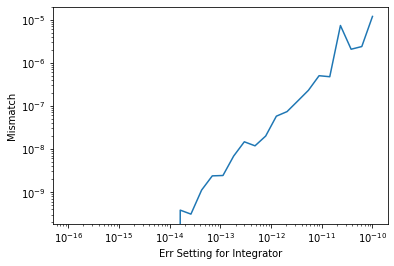

In [47]:
plt.close()
dt = 10.0
new_t = np.arange(0.0, min_t_max+dt, dt)
mismatch_list = []
for i, (t, p, e, Phi_r, Phi_r) in enumerate(out_list):
    spl = CubicSpline(t, Phi_r)
    new_Phi_r = spl(new_t)
    
    if i == 0:
        control = new_Phi_r
    
    comp = np.dot(np.exp(1j*control).conj(), np.exp(1j*new_Phi_r))
    norm1 = np.dot(np.exp(1j*control).conj(), np.exp(1j*control))
    norm2 = np.dot(np.exp(1j*new_Phi_r).conj(), np.exp(1j*new_Phi_r))
    mismatch = comp/np.sqrt(norm1*norm2)
    print(1 - mismatch.real)
    mismatch_list.append(mismatch)

ax = plt.gca()
mismatch_list = np.asarray(mismatch_list)
ax.loglog(err_arr, 1-mismatch_list.real)
ax.set_ylabel('Mismatch')
ax.set_xlabel('Err Setting for Integrator')